<a href="https://colab.research.google.com/github/ducquanhp28112002/Machine_Learning/blob/main/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài tập cơ bản với K - Means Clusteruing**

### Khai báo thư viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

### Đọc dữ liệu

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


### Tìm hiểu dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [ ]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


### K - Means

Text(0, 0.5, 'Income($)')

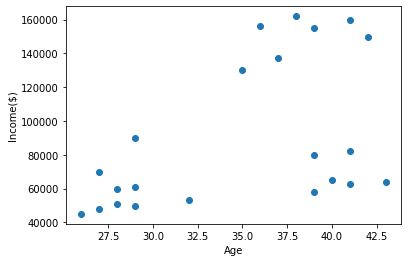

In [ ]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [ ]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [ ]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

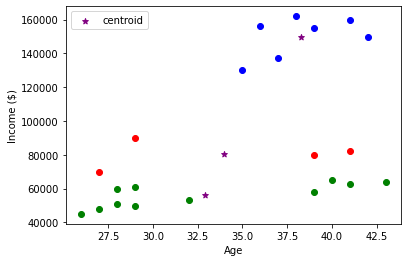

In [ ]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]
plt.scatter(df1["Age"], df1["Income($)"], color = "red")
plt.scatter(df2["Age"], df2["Income($)"], color = "blue")
plt.scatter(df3["Age"], df3["Income($)"], color = "green")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = "purple", marker = '*', label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()

### Tiền xử lý dữ liệu dùng min max scaler

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


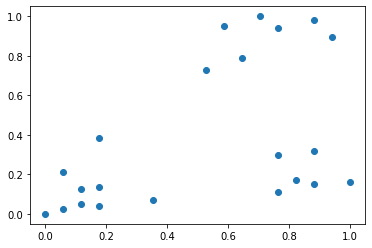

In [ ]:
plt.scatter(df["Age"], df["Income($)"])

### K - Means

In [ ]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

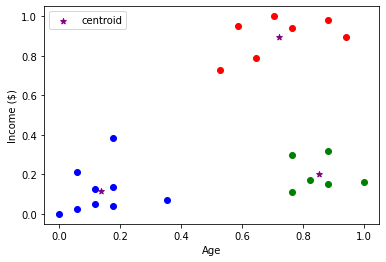

In [ ]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]
plt.scatter(df1["Age"], df1["Income($)"], color = "red")
plt.scatter(df2["Age"], df2["Income($)"], color = "blue")
plt.scatter(df3["Age"], df3["Income($)"], color = "green")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = "purple", marker = '*', label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()

### Phương pháp Elbow

In [ ]:
ssd = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[["Age", "Income($)"]])
    ssd.append(km.inertia_)

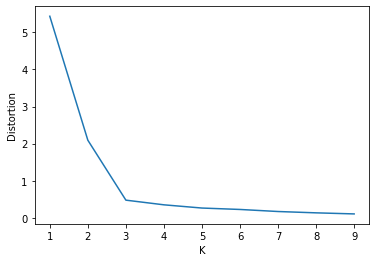

In [ ]:
plt.xlabel('K')
plt.ylabel('Distortion')
plt.plot(k_rng, ssd)